In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv(r'D:\PROJECTS\Sales-forecasting-with-Prophet\data set\train_data.csv')
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [51]:
df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [52]:
# Check the data type of the column
data_type = df['date'].dtype

# Print the data type
print("Data type of 'date_column':", data_type)

Data type of 'date_column': object


In [53]:
# converting the date column to datetime format
df['date']=pd.to_datetime(df['date'])


In [54]:
# Check the data type of the column
data_type = df['date'].dtype

# Print the data type
print("Data type of 'date_column':", data_type)

Data type of 'date_column': datetime64[ns]


In [55]:
agg_df = df.groupby(['date','family']).agg({'sales':'sum'}).reset_index().sort_values(['family','date'])
agg_df.head()

,date,family,sales
0,2013-01-01,AUTOMOTIVE,0.0
33,2013-01-02,AUTOMOTIVE,255.0
66,2013-01-03,AUTOMOTIVE,161.0
99,2013-01-04,AUTOMOTIVE,169.0
132,2013-01-05,AUTOMOTIVE,342.0


In [56]:
total_sales_df = agg_df.pivot(index='date',columns='family', values='sales')
total_sales_df.head()

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,2.0,810.0,0.0,180.58900,0.0,186.0,143.0,71.09000,...,0.0,110.801000,25.0,0.0,0.0,42.637000,37.847000,0.0,0.0,0.000000
2013-01-02,255.0,0.0,207.0,72092.0,0.0,26246.31900,0.0,74629.0,23381.0,15754.50000,...,0.0,20871.464028,17204.0,0.0,0.0,13975.884938,5338.111976,0.0,0.0,1526.750002
2013-01-03,161.0,0.0,125.0,52105.0,0.0,18456.48002,0.0,55893.0,18001.0,11172.45500,...,0.0,16597.398113,12568.0,0.0,0.0,10674.393983,3591.388005,0.0,0.0,1094.310994
2013-01-04,169.0,0.0,133.0,54167.0,0.0,16721.96901,0.0,52064.0,18148.0,10143.20900,...,0.0,21625.963055,11303.0,0.0,0.0,10772.515038,4472.965990,0.0,0.0,1293.120995
2013-01-05,342.0,0.0,191.0,77818.0,0.0,22367.76108,0.0,70128.0,23082.0,13734.94501,...,0.0,20879.091050,16819.0,0.0,0.0,13475.009055,5830.073020,0.0,0.0,1245.637004


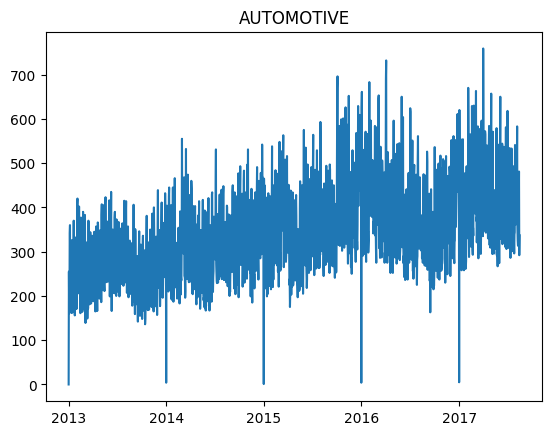

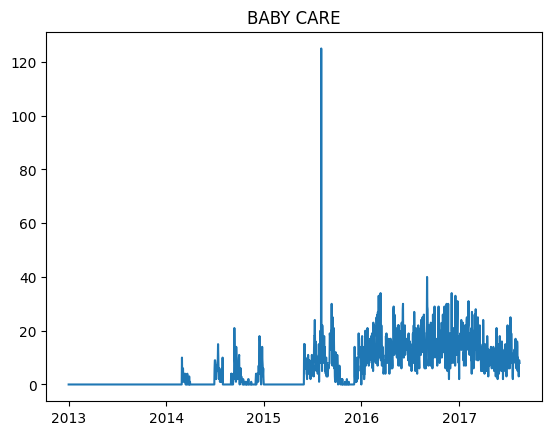

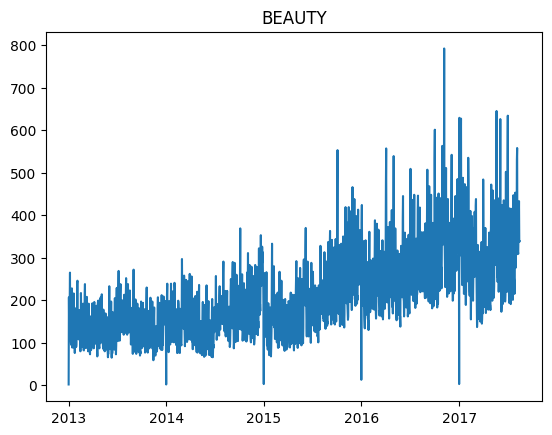

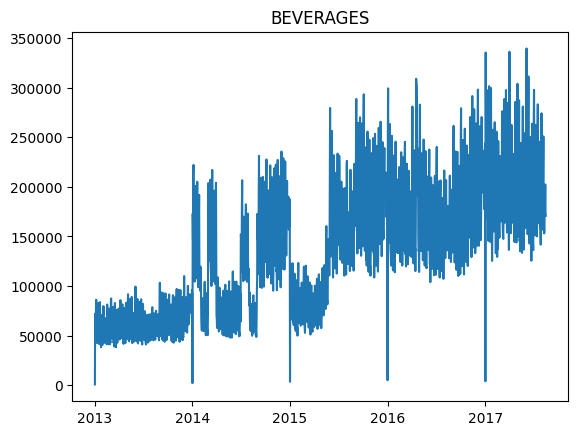

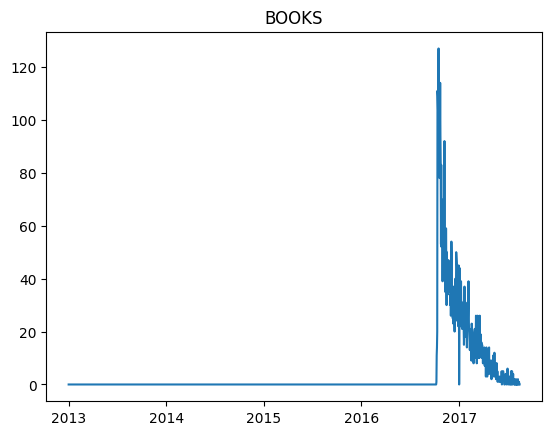

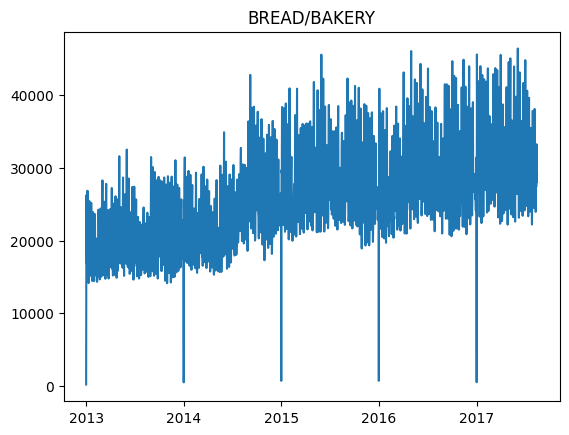

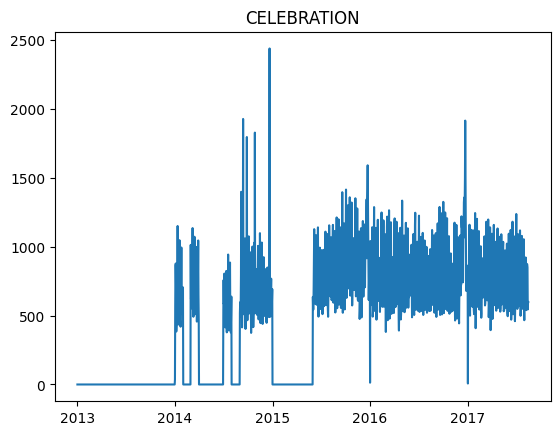

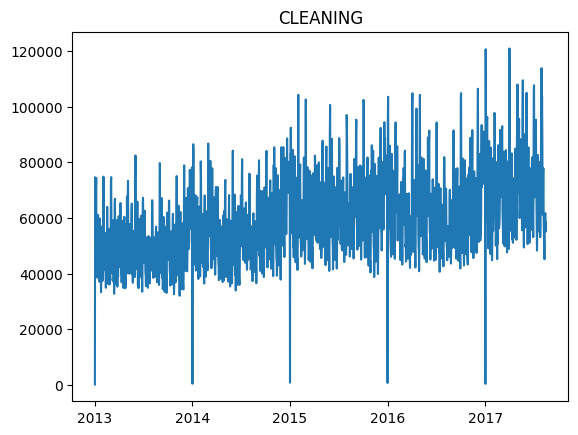

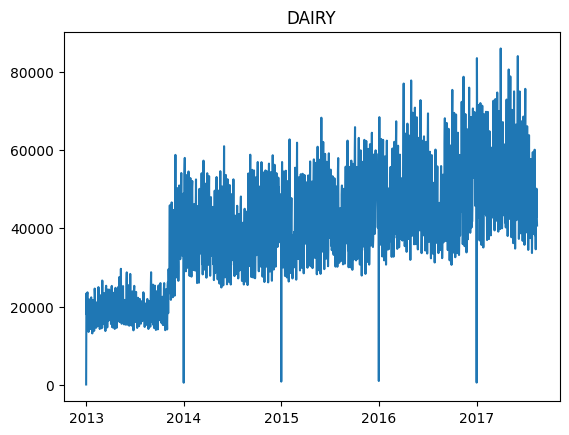

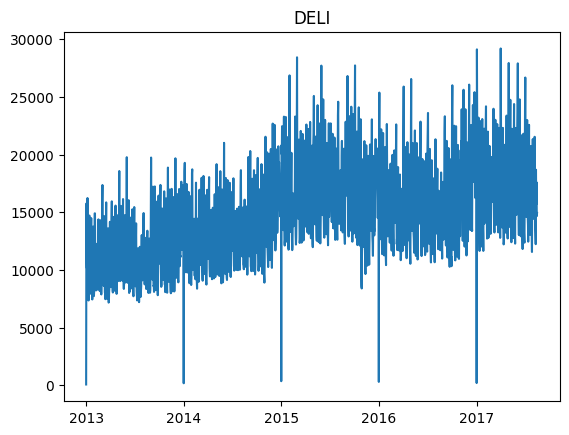

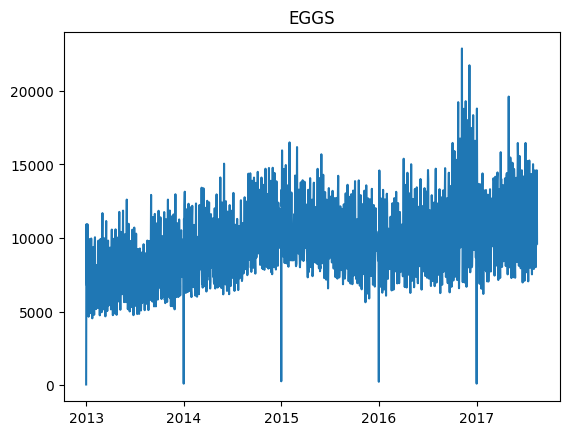

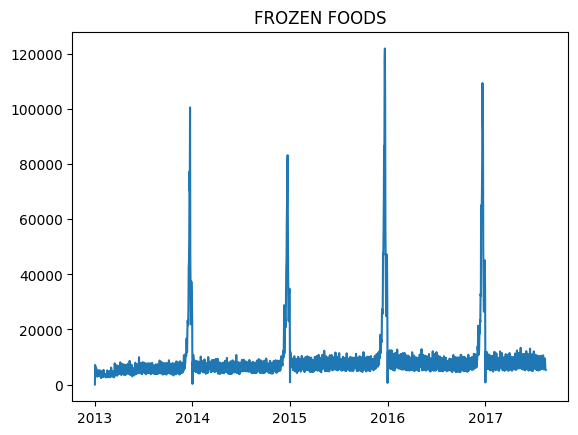

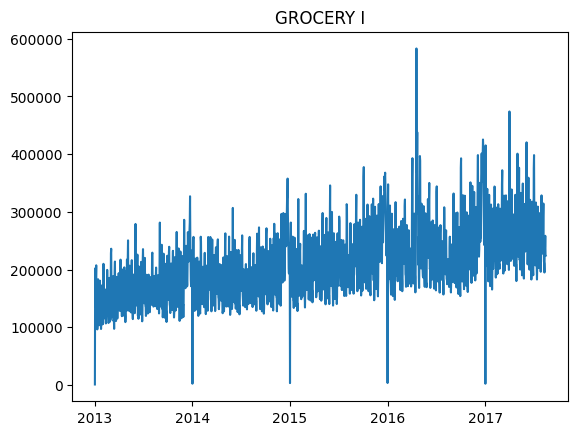

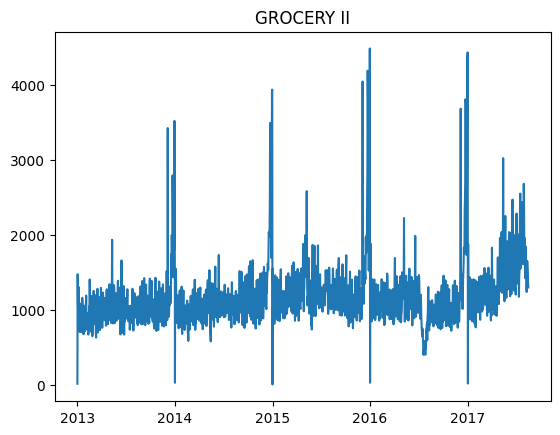

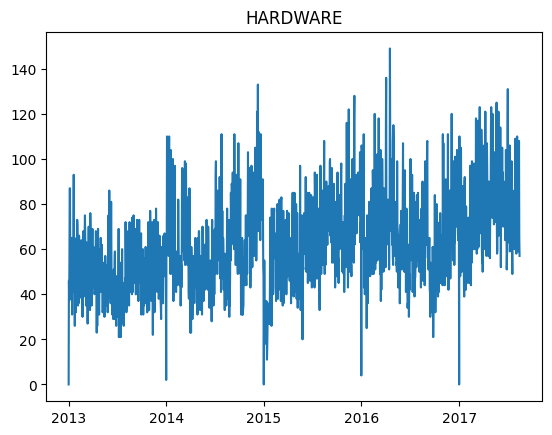

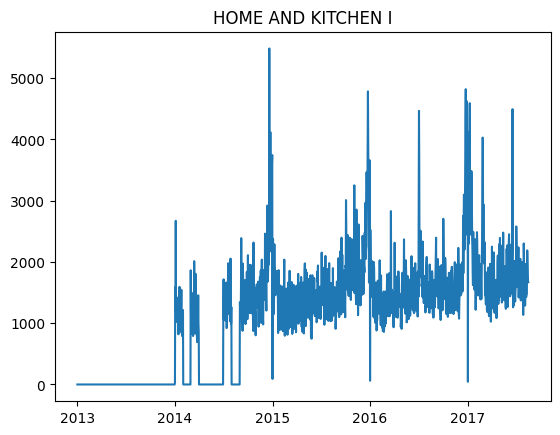

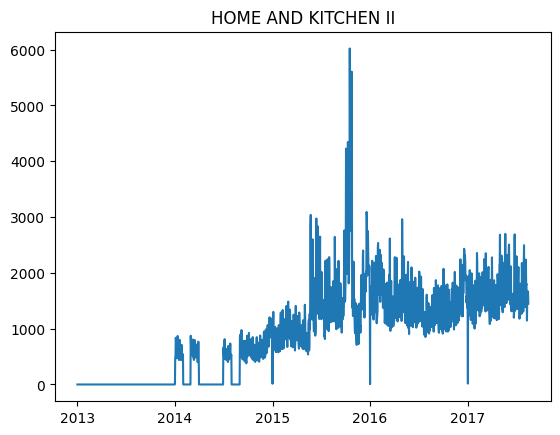

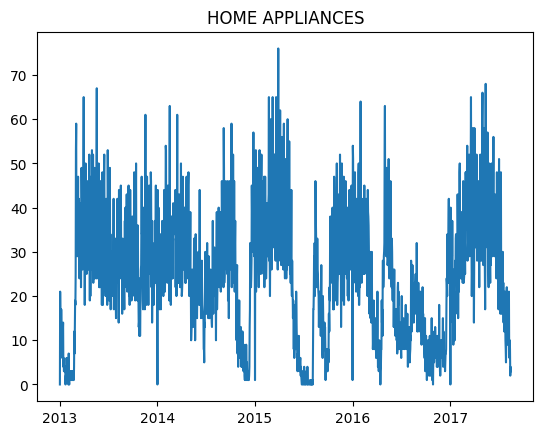

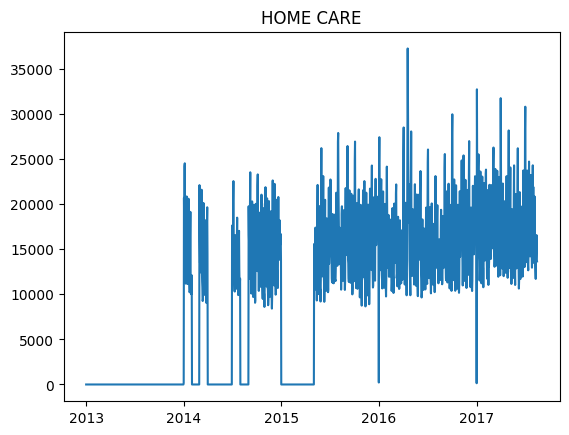

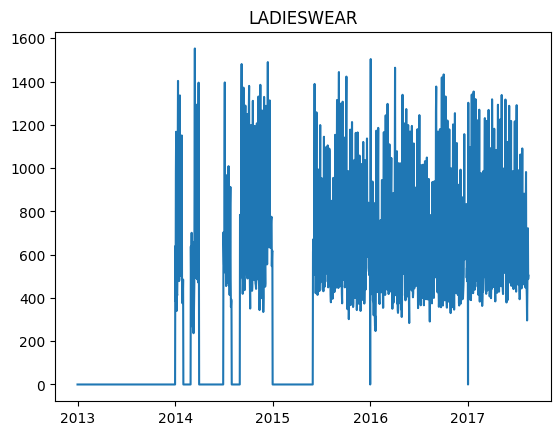

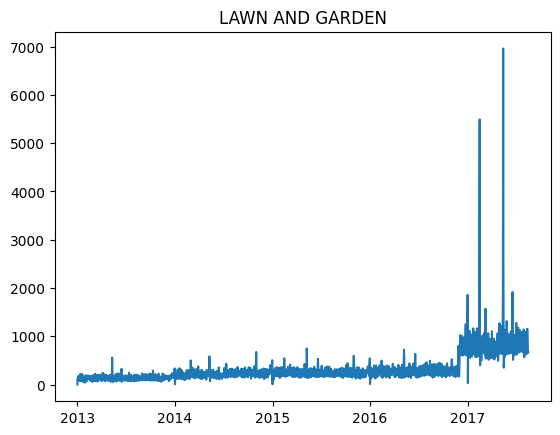

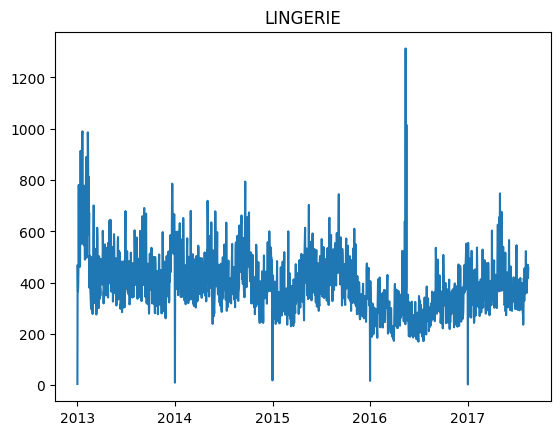

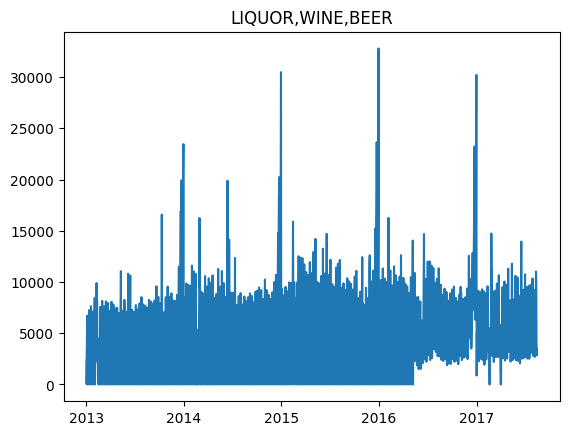

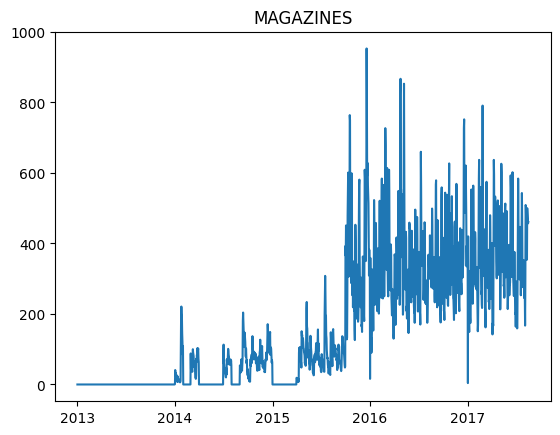

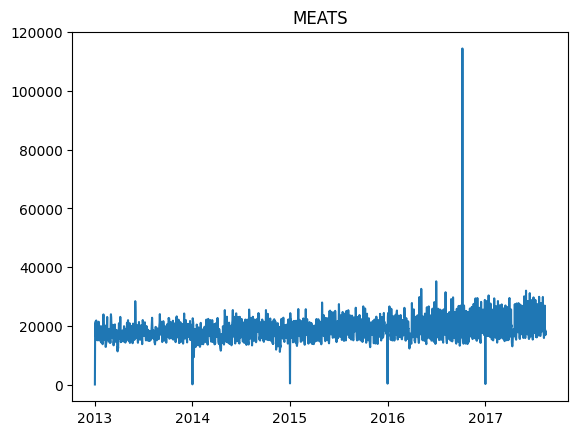

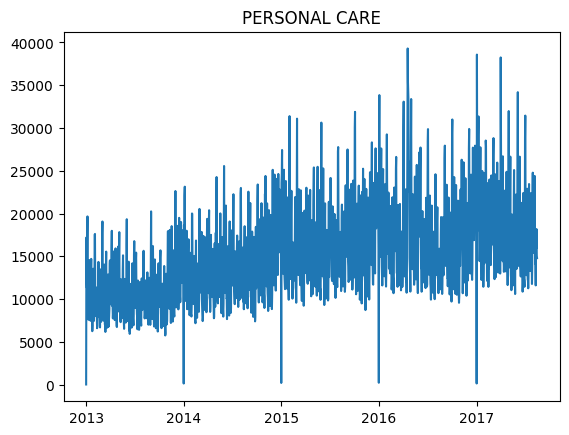

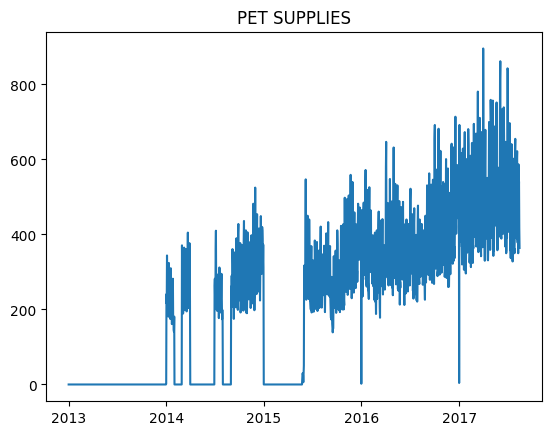

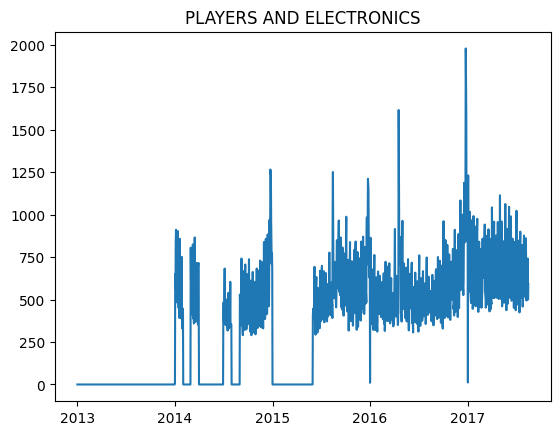

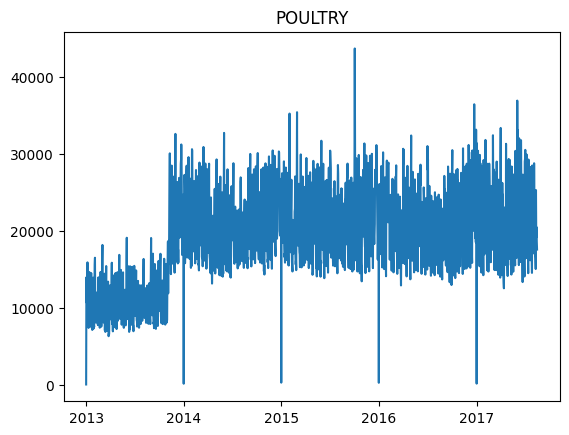

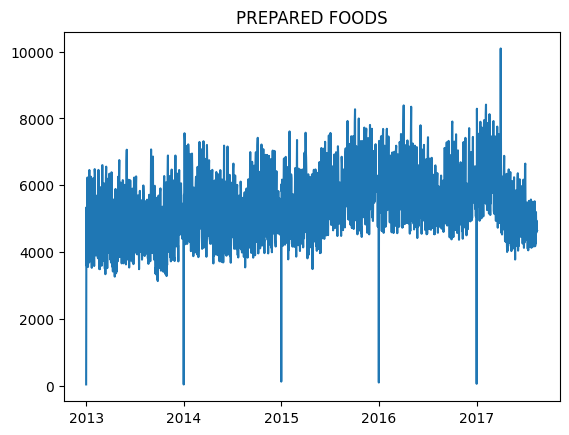

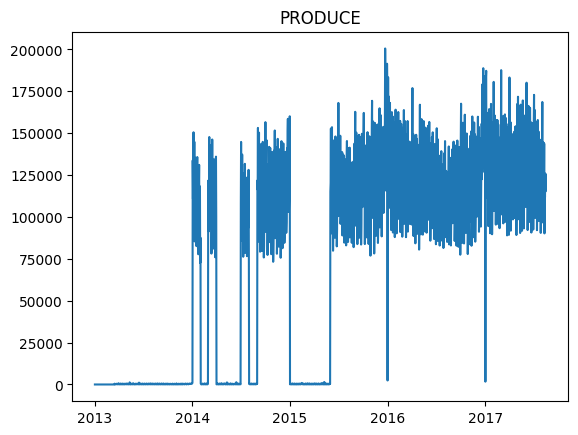

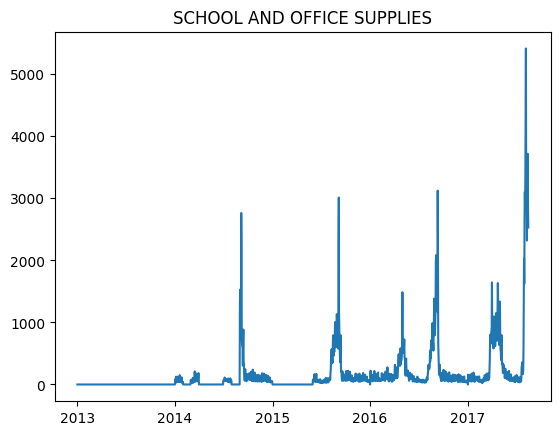

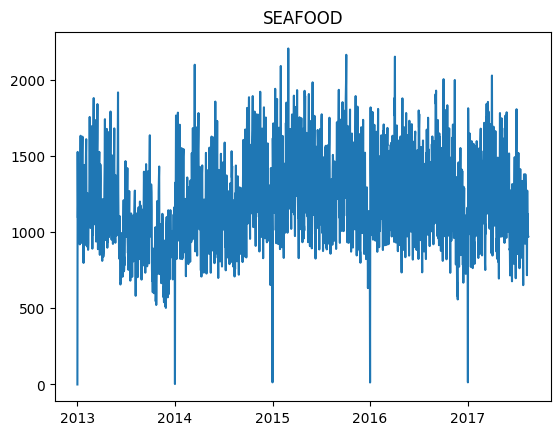

In [57]:
for column in total_sales_df.columns:
    plt.plot(total_sales_df[column])
    plt.title(column)
    plt.show()

In [58]:
# due to missing data, we are trimming the data before aug 15 2015
total_sales_df = total_sales_df[total_sales_df.index>='2015-08-15']
total_sales_df.head()

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2015-08-15,454.0,18.0,251.0,217135.0,0.0,32509.90608,1157.0,75837.0,48578.0,19946.925,...,153.0,20403.940990,19398.0,370.0,1250.0,24718.795975,6854.544020,128147.17800,701.0,1507.242994
2015-08-16,413.0,11.0,313.0,208213.0,0.0,34851.87800,724.0,75824.0,50930.0,21178.461,...,157.0,20616.159980,21048.0,359.0,913.0,25480.778935,6640.393014,131493.92710,793.0,1448.716997
2015-08-17,289.0,14.0,175.0,149741.0,0.0,26361.76895,593.0,59718.0,38358.0,15755.025,...,125.0,16725.028985,14854.0,263.0,593.0,18549.113000,5212.498015,102769.59890,458.0,1166.222013
2015-08-18,295.0,10.0,166.0,132609.0,0.0,23915.94802,709.0,52749.0,33273.0,14119.251,...,102.0,15377.124025,13064.0,193.0,519.0,15722.331040,4758.126975,106468.22500,494.0,951.633993
2015-08-19,314.0,5.0,176.0,131368.0,0.0,23995.15200,599.0,51157.0,35760.0,13250.039,...,102.0,15654.345964,12581.0,257.0,535.0,16360.620083,5275.078985,132449.57997,545.0,996.733998


In [59]:
for fam in total_sales_df.columns:
    print(f'The number of null values of column { fam } is {total_sales_df[fam].isnull().sum()}')
    

The number of null values of column AUTOMOTIVE is 0
The number of null values of column BABY CARE is 0
The number of null values of column BEAUTY is 0
The number of null values of column BEVERAGES is 0
The number of null values of column BOOKS is 0
The number of null values of column BREAD/BAKERY is 0
The number of null values of column CELEBRATION is 0
The number of null values of column CLEANING is 0
The number of null values of column DAIRY is 0
The number of null values of column DELI is 0
The number of null values of column EGGS is 0
The number of null values of column FROZEN FOODS is 0
The number of null values of column GROCERY I is 0
The number of null values of column GROCERY II is 0
The number of null values of column HARDWARE is 0
The number of null values of column HOME AND KITCHEN I is 0
The number of null values of column HOME AND KITCHEN II is 0
The number of null values of column HOME APPLIANCES is 0
The number of null values of column HOME CARE is 0
The number of null 

In [60]:
# finding the zero values of all the columns
(total_sales_df == 0).astype(int).sum()

family
AUTOMOTIVE                      0
BABY CARE                      46
BEAUTY                          0
BEVERAGES                       0
BOOKS                         443
BREAD/BAKERY                    0
CELEBRATION                     0
CLEANING                        0
DAIRY                           0
DELI                            0
EGGS                            0
FROZEN FOODS                    0
GROCERY I                       0
GROCERY II                      0
HARDWARE                        1
HOME AND KITCHEN I              0
HOME AND KITCHEN II             0
HOME APPLIANCES                 3
HOME CARE                       0
LADIESWEAR                      2
LAWN AND GARDEN                 0
LINGERIE                        0
LIQUOR,WINE,BEER               42
MAGAZINES                       0
MEATS                           0
PERSONAL CARE                   0
PET SUPPLIES                    0
PLAYERS AND ELECTRONICS         0
POULTRY                         0
PREPARE

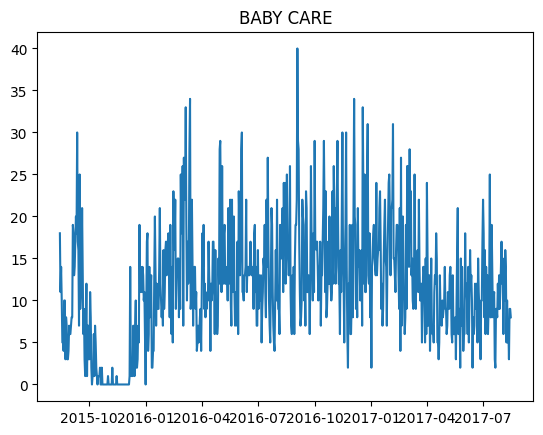

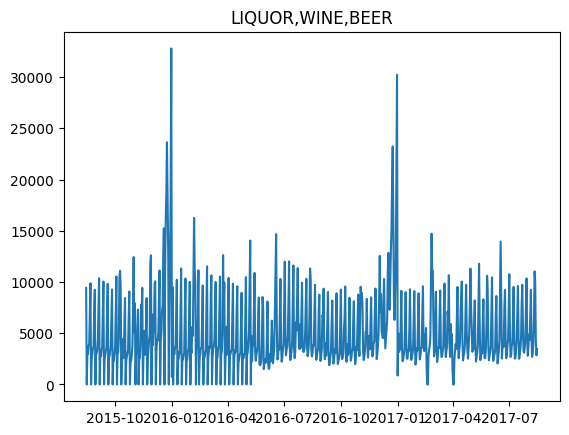

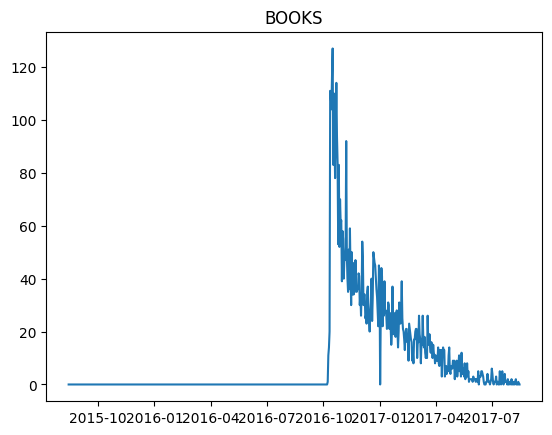

In [61]:
# BABY CARE, BOOKS , LIQUOR,WINE,BEER  have too many zero values
plt.plot(total_sales_df['BABY CARE'])
plt.title("BABY CARE")
plt.show()
plt.plot(total_sales_df['LIQUOR,WINE,BEER'])
plt.title("LIQUOR,WINE,BEER")
plt.show()
plt.plot(total_sales_df['BOOKS'])
plt.title("BOOKS")
plt.show()

Let's categorize these different groups based on the volume of data. Having higher volume data is advantageous for forecasting as it allows us to forecast beyond the noise, resulting in lower error margins. Additionally, organizing the data by volume will enable us to visualize the forecasts on comparable scales, aiding in determining the feasibility of time series modeling for each category. Time series modeling heavily relies on seasonal data of a specific variation, whether additive or multiplicative, and organizing the data by volume will help identify the suitability of such modeling approaches for each category

In [62]:
#Category Grouping
#lets break it down by thirds for low, mid, high
avg_daily_sales = total_sales_df.apply(np.mean, axis=0).sort_values()
low, mid = np.percentile(total_sales_df.apply(np.mean, axis=0).sort_values(),[33,66])
low_vol_columns = list(avg_daily_sales[avg_daily_sales<=low].index)
mid_vol_columns = avg_daily_sales[(avg_daily_sales>low) & (avg_daily_sales<mid)].index
high_vol_columns = avg_daily_sales[avg_daily_sales>=mid].index

In [63]:
high_vol_columns

Index(['HOME CARE', 'DELI', 'PERSONAL CARE', 'MEATS', 'POULTRY',
       'BREAD/BAKERY', 'DAIRY', 'CLEANING', 'PRODUCE', 'BEVERAGES',
       'GROCERY I'],
      dtype='object', name='family')

## Let's test things out with a high volume metric first to see if things work ##

In [64]:
#setting variables
feature = 'PRODUCE'
prediction_days = 30

In [65]:
df = total_sales_df[[feature]].reset_index()
df.head()

family,date,PRODUCE
0,2015-08-15,128147.17800
1,2015-08-16,131493.92710
2,2015-08-17,102769.59890
3,2015-08-18,106468.22500
4,2015-08-19,132449.57997


In [66]:
#adding holiday data
import holidays
holiday = pd.DataFrame([])

ecuador_holidays = holidays.EC()  # this is a dict
# the below is the same, but takes a string:
ecuador_holidays = holidays.country_holidays('EC')  # this is a dict


for date_, name in sorted(holidays.EC(years=[2015,2016,2017,2018]).items()):
    holiday = pd.concat([holiday, pd.DataFrame({'ds': date_, 'holiday': "EC-Holidays", 'lower_window': -2, 'upper_window': 1}, index=[0])], ignore_index=True) 

holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
holiday.head()

C:\Users\sreeh\AppData\Local\Temp\ipykernel_21580\4217439713.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')


,ds,holiday,lower_window,upper_window
0,2015-01-01,EC-Holidays,-2,1
1,2015-02-16,EC-Holidays,-2,1
2,2015-02-17,EC-Holidays,-2,1
3,2015-04-03,EC-Holidays,-2,1
4,2015-05-01,EC-Holidays,-2,1


In [67]:
#Variables
from datetime import datetime, timedelta, date
forecast_start_dt = date(2017,7,1) #data set ends of (2017,8,15)
forecast_start_date = (forecast_start_dt).strftime("%Y-%m-%d") 
print(forecast_start_date)

2017-07-01


In [68]:
#PROPHET MODEL
#prophet library
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

df_copy = df.copy()
df_copy = df_copy.rename(columns={'date': 'ds', feature: 'y'})
df_copy[['y']] = df_copy[['y']].apply(pd.to_numeric)

df_copy['ds'] = pd.to_datetime(df_copy['ds'])

train_set = df_copy[(df_copy['ds'] < forecast_start_date) ]

m = Prophet()

m.fit(train_set)

future = m.make_future_dataframe(periods=prediction_days)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]


12:16:24 - cmdstanpy - INFO - Chain [1] start processing
12:16:24 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
predicted_df.head(10)

,ds,yhat
684,2017-07-01,144618.473423
685,2017-07-02,155341.685734
686,2017-07-03,122390.829532
687,2017-07-04,127649.412428
688,2017-07-05,160258.378678
689,2017-07-06,102675.738460
690,2017-07-07,116024.437254
691,2017-07-08,144872.512971
692,2017-07-09,155595.725283
693,2017-07-10,122644.869081


In [70]:
df_copy = df.copy()
df_copy.columns = ['ds', 'ytrue']
predicted_df = predicted_df.merge(df_copy)

In [71]:
predicted_df

,ds,yhat,ytrue
0,2017-07-01,144618.473423,155487.63090
1,2017-07-02,155341.685734,172890.13860
2,2017-07-03,122390.829532,130389.19902
3,2017-07-04,127649.412428,131534.54802
4,2017-07-05,160258.378678,163804.33003
5,2017-07-06,102675.738460,99395.60498
6,2017-07-07,116024.437254,114346.57410
7,2017-07-08,144872.512971,139294.77300
8,2017-07-09,155595.725283,156633.92050
9,2017-07-10,122644.869081,118856.99105


In [72]:
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE).
    
    Parameters:
        y_true (array-like): Array of true values.
        y_pred (array-like): Array of predicted values.
        
    Returns:
        float: Mean Absolute Percentage Error (MAPE).
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [73]:
mean_absolute_percentage_error(predicted_df['ytrue'], predicted_df['yhat'])

6.2695463285966

### Cross Validation with Prophet ###
Find the "best" parameters by testing over various periods of time with those parameters (cross-validation).

In [74]:
m = Prophet()
m.fit(train_set)
df_cv = cross_validation(m, initial='365 days', period='30 days', horizon = '30 days')

12:16:25 - cmdstanpy - INFO - Chain [1] start processing
12:16:25 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/10 [00:00<?, ?it/s]12:16:25 - cmdstanpy - INFO - Chain [1] start processing
12:16:25 - cmdstanpy - INFO - Chain [1] done processing
 10%|█         | 1/10 [00:00<00:01,  7.03it/s]12:16:25 - cmdstanpy - INFO - Chain [1] start processing
12:16:25 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 2/10 [00:00<00:01,  6.25it/s]12:16:25 - cmdstanpy - INFO - Chain [1] start processing
12:16:25 - cmdstanpy - INFO - Chain [1] done processing
 30%|███       | 3/10 [00:00<00:01,  6.57it/s]12:16:25 - cmdstanpy - INFO - Chain [1] start processing
12:16:25 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 4/10 [00:00<00:00,  6.48it/s]12:16:25 - cmdstanpy - INFO - Chain [1] start processing
12:16:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 5/10 [00:00<00:00,  6.43it/s]12:16:26 - cmdstanpy - INFO - Chain [1] start processi

In [75]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,4.133612e+08,20331.285570,13110.675549,0.089795,0.065852,0.096021,0.800000
1,4 days,2.703561e+08,16442.508418,11138.397264,0.079789,0.058256,0.083668,0.803448
2,5 days,1.419225e+08,11913.124245,8919.139012,0.067913,0.056825,0.070012,0.865517
3,6 days,1.266368e+08,11253.301413,9242.824974,0.071520,0.071845,0.073553,0.868966
4,7 days,9.639713e+07,9818.204116,8434.362030,0.066436,0.069632,0.067274,0.934483
5,8 days,7.637333e+07,8739.183621,7696.800517,0.061047,0.064641,0.060967,0.968966
6,9 days,6.148068e+07,7840.961594,6605.295404,0.055089,0.043894,0.053913,0.965517
7,10 days,4.933398e+07,7023.815190,5436.307997,0.047213,0.037743,0.045525,0.965517
8,11 days,7.869303e+07,8870.909452,6725.698276,0.054882,0.041412,0.053712,0.934483
9,12 days,8.338613e+07,9131.600620,6726.871201,0.052272,0.046883,0.052020,0.931034


In [76]:
#Optimizing for "PRODUCE" feature. What that means is... lets hypertune this model!

In [77]:
import itertools 
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = [] 

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train_set)  # Fit model with given params
    df_cv = cross_validation(m, initial='365 days', period='30 days', horizon = '30 days', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

12:16:26 - cmdstanpy - INFO - Chain [1] start processing
12:16:27 - cmdstanpy - INFO - Chain [1] done processing
12:16:30 - cmdstanpy - INFO - Chain [1] start processing
12:16:30 - cmdstanpy - INFO - Chain [1] done processing
12:16:35 - cmdstanpy - INFO - Chain [1] start processing
12:16:35 - cmdstanpy - INFO - Chain [1] done processing
12:16:40 - cmdstanpy - INFO - Chain [1] start processing
12:16:40 - cmdstanpy - INFO - Chain [1] done processing
12:16:45 - cmdstanpy - INFO - Chain [1] start processing
12:16:45 - cmdstanpy - INFO - Chain [1] done processing
12:16:49 - cmdstanpy - INFO - Chain [1] start processing
12:16:50 - cmdstanpy - INFO - Chain [1] done processing
12:16:53 - cmdstanpy - INFO - Chain [1] start processing
12:16:54 - cmdstanpy - INFO - Chain [1] done processing
12:16:57 - cmdstanpy - INFO - Chain [1] start processing
12:16:58 - cmdstanpy - INFO - Chain [1] done processing
12:17:01 - cmdstanpy - INFO - Chain [1] start processing
12:17:02 - cmdstanpy - INFO - Chain [1]

In [78]:
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale          rmse
0                     0.001                     0.01  18782.744407
1                     0.001                     0.10  18893.212747
2                     0.001                     1.00  18576.718945
3                     0.001                    10.00  18559.792562
4                     0.010                     0.01  18219.078433
5                     0.010                     0.10  17783.847283
6                     0.010                     1.00  17762.833451
7                     0.010                    10.00  17719.628321
8                     0.100                     0.01  18055.734483
9                     0.100                     0.10  17747.484855
10                    0.100                     1.00  17724.970016
11                    0.100                    10.00  17725.026336
12                    0.500                     0.01  18085.315283
13                    0.500                     0.10  17735.36

In [79]:
tuning_results.sort_values('rmse')

,changepoint_prior_scale,seasonality_prior_scale,rmse
7,0.010,10.00,17719.628321
10,0.100,1.00,17724.970016
11,0.100,10.00,17725.026336
13,0.500,0.10,17735.369542
9,0.100,0.10,17747.484855
15,0.500,10.00,17752.898902
14,0.500,1.00,17757.463184
6,0.010,1.00,17762.833451
5,0.010,0.10,17783.847283
8,0.100,0.01,18055.734483


In [80]:
tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0]

changepoint_prior_scale        0.010000
seasonality_prior_scale       10.000000
rmse                       17719.628321
Name: 0, dtype: float64

In [81]:
dict(tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0])

{'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 10.0,
 'rmse': 17719.62832124312}

In [82]:
params_dictionary = dict(tuning_results.sort_values('rmse').reset_index(drop=True).drop('rmse',axis='columns').iloc[0])

m = Prophet(changepoint_prior_scale = params_dictionary['changepoint_prior_scale'], 
            seasonality_prior_scale = params_dictionary['seasonality_prior_scale'])

In [83]:
m.fit(train_set)

future = m.make_future_dataframe(periods=prediction_days)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

df_copy = df.copy()
df_copy.columns = ['ds', 'ytrue']
predicted_df = predicted_df.merge(df_copy)
mean_absolute_percentage_error(predicted_df['ytrue'], predicted_df['yhat'])

12:17:35 - cmdstanpy - INFO - Chain [1] start processing


12:17:35 - cmdstanpy - INFO - Chain [1] done processing


4.837441712614779